# PROJECT TITLE:PREDICT HEART ATTACK 

# PROJECT DESCRIPTION:


# 1.EDA


# 2.PCA AND LOGISTIC REGRESSION

# 3.ENSEMBLING

# 4.DATA VISUALIZATION

# Import Necessary Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading The File:

In [2]:
df=pd.read_csv (r"heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

# EDA

# EDA PART 1: Handling Missing Values

In [6]:
df.isnull()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False  False  False   False  

[303 rows x 14 columns]

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# THERE IS NO MISSING VALUES IN MY DATASET

# EDA PART II:Removal of duplicated records

In [8]:
df.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

# EDA PART III:Outlier Treatment

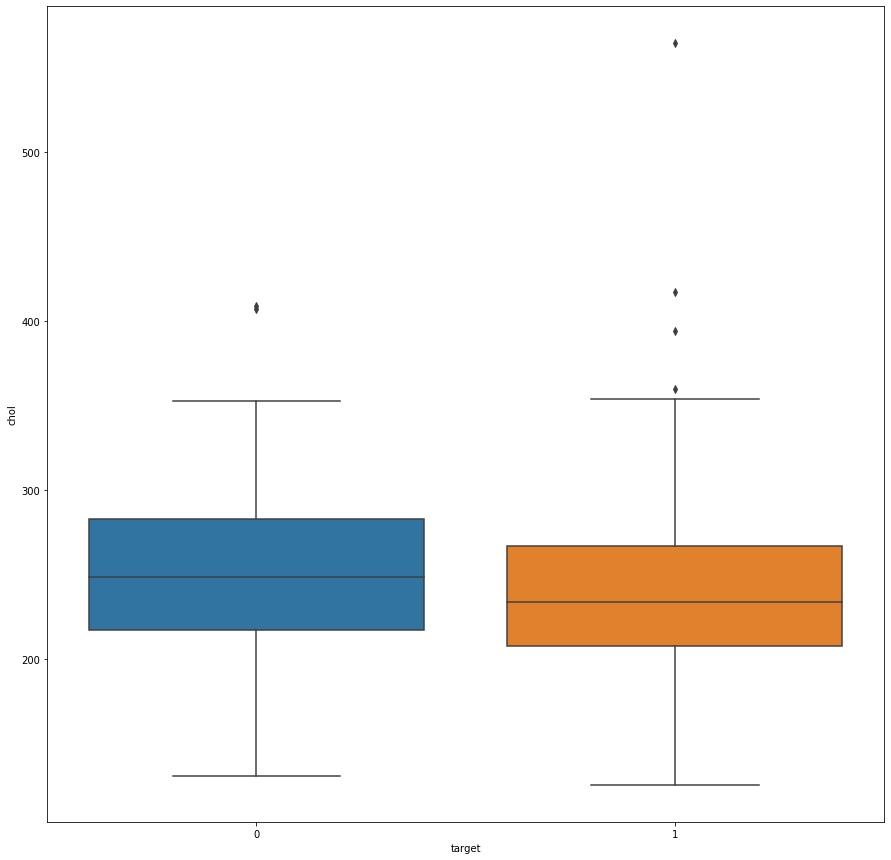

In [9]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x="target",y="chol")
plt.show()

In [10]:
df[(df["target"]==0) & (df["chol"] >=400)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
220   63    0   0       150   407    0        0      154      0      4.0   
246   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  
220      1   3     3       0  
246      1   2     3       0

In [11]:
df[(df["target"]==1) & (df["chol"] >=350)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4    57    0   0       120   354    0        1      163      1      0.6   
28   65    0   2       140   417    1        0      157      0      0.8   
39   65    0   2       160   360    0        0      151      0      0.8   
85   67    0   2       115   564    0        0      160      0      1.6   
96   62    0   0       140   394    0        0      157      0      1.2   

    slope  ca  thal  target  
4       2   0     2       1  
28      2   1     2       1  
39      2   0     2       1  
85      1   0     3       1  
96      1   0     2       1

# REMOVING OUTLIER

In [12]:
df.drop(220,inplace=True)

In [13]:
df.drop(246,inplace=True)

In [14]:
df.drop(4,inplace=True)

In [15]:
df.drop(28,inplace=True)

In [16]:
df.drop(39,inplace=True)

In [17]:
df.drop(85,inplace=True)

In [18]:
df.drop(96,inplace=True)

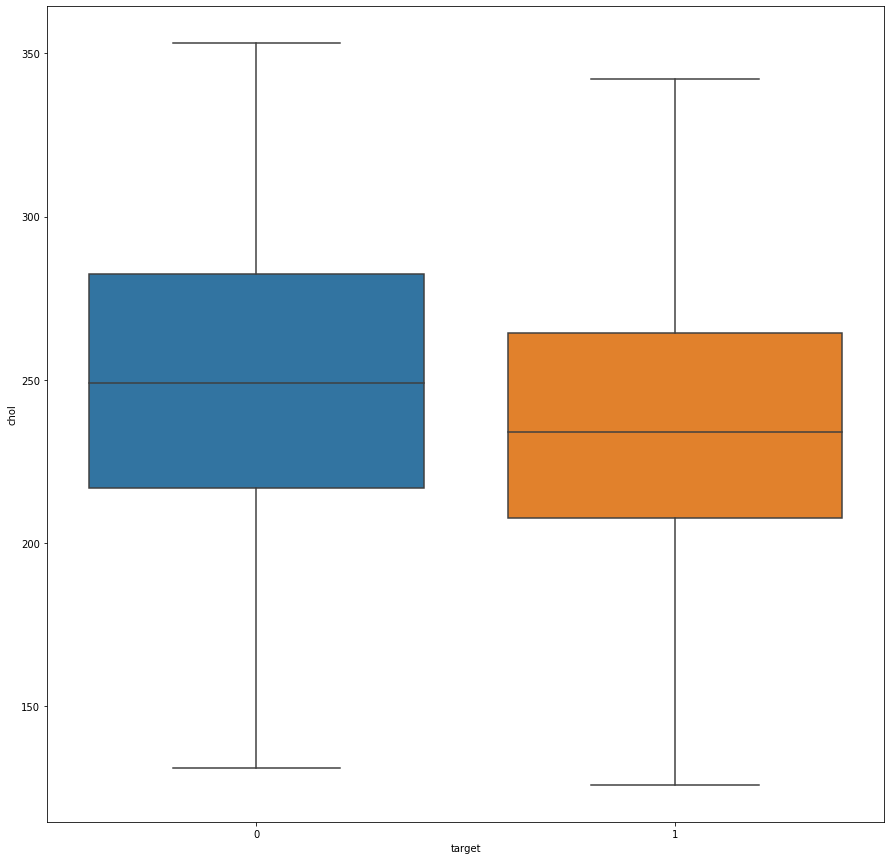

In [19]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x="target",y="chol")
plt.show()

# THERE IS NO OUTLIER PRESENT ABOVE DIAGRAM

# EDA Part-IV Coverting Categorical Variable to Numerical

In [20]:
df_rev =pd.DataFrame.copy(df)

In [21]:
df_rev

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
5     57    1   0       140   192    0        1      148      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
5        1   0     1       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[296 rows x 14 columns]

In [22]:
colname=[]
for X in df_rev.columns:
    if df_rev[X].dtype=="object":
      colname.append(X)
colname

[]

# HERE EMPTY LIST IS PRESENT MEANS THERE IS NO CATEGORICAL DATA PRESENT IN MY DATASET

In [23]:
df_rev

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
5     57    1   0       140   192    0        1      148      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
5        1   0     1       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[296 rows x 14 columns]

In [24]:
df_rev.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EDA Part _V Scaling of data by Standard Scaler


In [25]:
df_rev.shape

(296, 14)

In [26]:
X=df_rev.values[:,:-1]
Y=df_rev.values[:,-1]

In [27]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [28]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)## will checck Mu and sigma values for each varible 
print(X)


[[ 0.97173477  0.65570702  1.96907411 ... -2.26408737 -0.71341221
  -2.13664681]
 [-1.89357971  0.65570702  0.99928054 ... -2.26408737 -0.71341221
  -0.50662759]
 [-1.4527621  -1.52507137  0.02948697 ...  0.97344819 -0.71341221
  -0.50662759]
 ...
 [ 1.52275679  0.65570702 -0.94030661 ... -0.64531959  1.25096002
   1.12339162]
 [ 0.31050835  0.65570702 -0.94030661 ... -0.64531959  0.2687739
   1.12339162]
 [ 0.31050835 -1.52507137  0.02948697 ... -0.64531959  0.2687739
  -0.50662759]]


# EDA Part_VI Handling Skewness

# How to check Data is skewd or not?

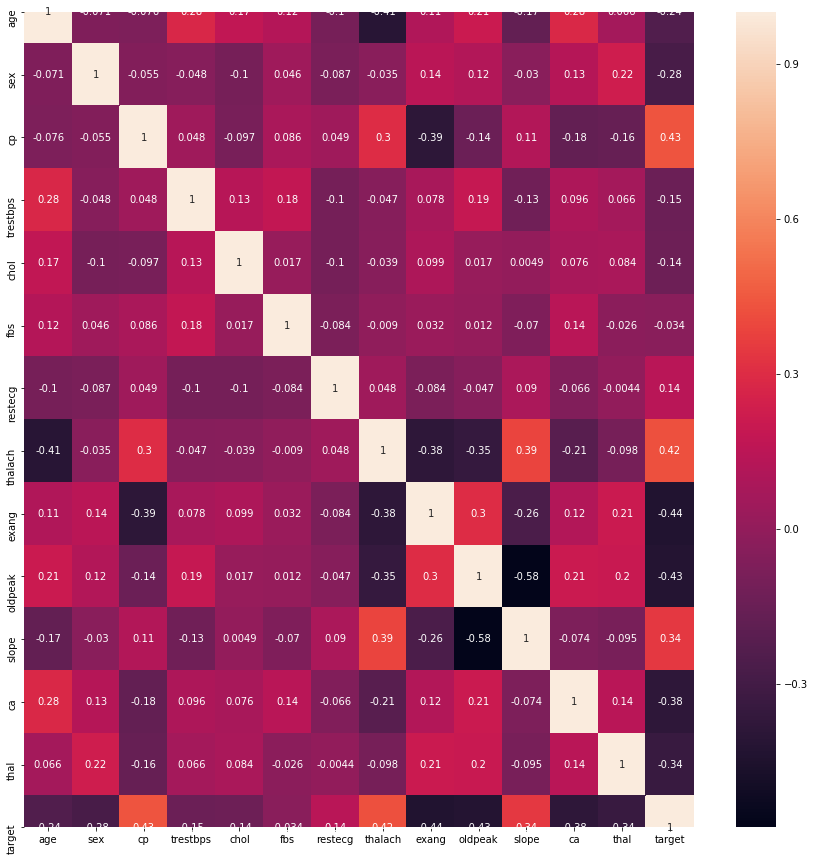

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df_rev.corr(),annot=True)
plt.show()

skewness:  0.13162658464067437


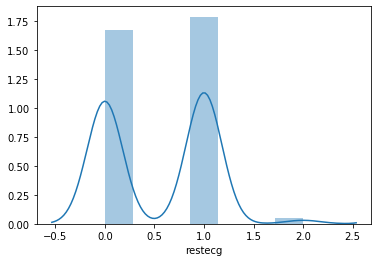

In [31]:
from scipy.stats import skew
print("skewness: ",skew(df_rev["restecg"]))
sns.distplot(df_rev["restecg"])
plt.show()

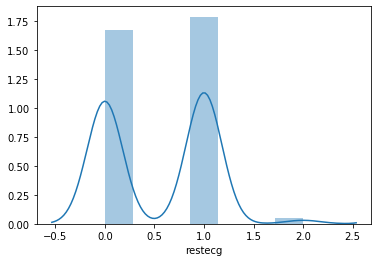

In [32]:
Y=df_rev["restecg"]
sns.distplot(Y,hist=True)

# Solution - np.sqrt

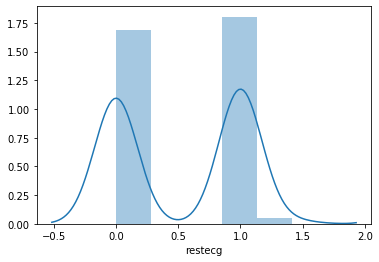

In [33]:

import numpy as np 
Y_sqrt = np.sqrt(Y) 
sns.distplot(Y_sqrt,hist=True)

In [34]:
print("skewness: ",skew(Y_sqrt))

skewness:  -0.06161636325834377


# Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
# Also, let's segregate the data into separate variables so that the features and the labels are separated.

In [35]:
array = df_rev.values
X = array[:,0:13] # Observe Indexing
Y = array[:,13]


# The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared

In [36]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
# Feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores

print(fit.scores_)

features = fit.transform(X)
df_rev.columns

[ 26.22333795   6.94232737  60.86256405  14.895291    43.95425758
   0.29117647   3.09435812 188.55985767  38.44378411  70.90447956
   9.47730179  61.30901505   5.55886223]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [38]:
# Summarize selected features
print(features[0:5,:])

[[  3.  150.    2.3   0. ]
 [  2.  187.    3.5   0. ]
 [  1.  172.    1.4   0. ]
 [  1.  178.    0.8   0. ]
 [  0.  148.    0.4   0. ]]


# PRINCIPAL COMPONENT ANALYSIS:

In [39]:
df_rev

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
5     57    1   0       140   192    0        1      148      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
5        1   0     1       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[296 rows x 14 columns]

In [40]:
array = df_rev.values
X = array[:,0:13] # Observe Indexing
Y = array[:,13]


In [41]:
# Applying PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = None) #to view the entire eigen vector,no subsetting 
X = pca.fit_transform(X) 
#X_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[6.81172063e-01 1.90965317e-01 1.05768639e-01 2.05344799e-02
 4.70386446e-04 3.51531983e-04 2.87281125e-04 1.26132928e-04
 9.78542968e-05 7.41138376e-05 6.19841264e-05 5.09508201e-05
 3.92658650e-05]


In [42]:
# Applying PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = .8) #to view the entire eigen vector,no subsetting 
X = pca.fit_transform(X) 
#X_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.68117206 0.19096532]


# Create X and Y

In [43]:
X = df_rev.drop('target',axis=1)
Y=df_rev["target"]

# Scaling 

In [44]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X)
X = s.transform(X)
X

array([[ 0.97173477,  0.65570702,  1.96907411, ..., -2.26408737,
        -0.71341221, -2.13664681],
       [-1.89357971,  0.65570702,  0.99928054, ..., -2.26408737,
        -0.71341221, -0.50662759],
       [-1.4527621 , -1.52507137,  0.02948697, ...,  0.97344819,
        -0.71341221, -0.50662759],
       ...,
       [ 1.52275679,  0.65570702, -0.94030661, ..., -0.64531959,
         1.25096002,  1.12339162],
       [ 0.31050835,  0.65570702, -0.94030661, ..., -0.64531959,
         0.2687739 ,  1.12339162],
       [ 0.31050835, -1.52507137,  0.02948697, ..., -0.64531959,
         0.2687739 , -0.50662759]])

In [45]:
Y = Y.astype(int)

# Split

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Train

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predict

In [48]:
Y_pred = lr.predict(X_test)

print(list(zip(Y_test,Y_pred)))

print(lr.intercept_)
print(lr.coef_)

[(0, 1), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0)]
[0.0976547]
[[-0.05549537 -0.69316754  0.79375064 -0.20112402 -0.29126549 -0.11105914
   0.29072082  0.43993512 -0.42423984 -0.59856021  0.30592324 -0.78511219
  -0.57390763]]


# Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm = confusion_matrix(Y_test,Y_pred)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,Y_pred))

print('Accuracy Score')
print(accuracy_score(Y_test,Y_pred))

Confucion Matrix
[[22  6]
 [ 4 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.82      0.88      0.85        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score
0.8333333333333334


# Tuning

In [50]:
# default presiction 0.5
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[0.20401185, 0.79598815],
       [0.52550526, 0.47449474],
       [0.8948424 , 0.1051576 ],
       [0.009181  , 0.990819  ],
       [0.00369854, 0.99630146],
       [0.6669866 , 0.3330134 ],
       [0.17951662, 0.82048338],
       [0.94961291, 0.05038709],
       [0.06438186, 0.93561814],
       [0.8759224 , 0.1240776 ],
       [0.23520365, 0.76479635],
       [0.2455258 , 0.7544742 ],
       [0.06852578, 0.93147422],
       [0.93042622, 0.06957378],
       [0.23765318, 0.76234682],
       [0.80343012, 0.19656988],
       [0.99093237, 0.00906763],
       [0.35356744, 0.64643256],
       [0.32025308, 0.67974692],
       [0.94430773, 0.05569227],
       [0.85521948, 0.14478052],
       [0.05642503, 0.94357497],
       [0.93746227, 0.06253773],
       [0.01108261, 0.98891739],
       [0.40641059, 0.59358941],
       [0.11932476, 0.88067524],
       [0.05981872, 0.94018128],
       [0.23365624, 0.76634376],
       [0.03114751, 0.96885249],
       [0.12130346, 0.87869654],
       [0.

In [51]:
# Manual adjustment
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
y_pred_class

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

In [52]:
cfm = confusion_matrix(Y_test,y_pred_class)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,y_pred_class))

print('Accuracy Score')
print(accuracy_score(Y_test,y_pred_class))

Confucion Matrix
[[22  6]
 [ 4 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.82      0.88      0.85        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score
0.8333333333333334


In [53]:
## Please mind indentnts

for a in np.arange(0.3,0.8,0.01): 
    ##np.arange(0,1.01,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine) 
    total_err=cfm[0,1]+cfm[1,0] 
    acc=accuracy_score(Y_test,predict_mine)
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1],'Accuracy :',round(acc,2))

Errors at threshold  0.3 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.31 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.32 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.33 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.34 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.35000000000000003 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.36000000000000004 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.37000000000000005 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.38000000000000006 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.39000000000000007 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.4000000000000001 : 9  , type 2 error : 1  , type 

# select best threshold 0.64

In [54]:
# Manual adjustment
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.64:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
y_pred_class

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [55]:
cfm = confusion_matrix(Y_test,y_pred_class)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,y_pred_class))

print('Accuracy Score')
print(accuracy_score(Y_test,y_pred_class))

Confucion Matrix
[[24  4]
 [ 6 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.81      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Accuracy Score
0.8333333333333334


# here we will be experimenting with 3 algorithms

# 1.KNeighborsClassifier

# 2.DecisionTreeClassifier

# 3.RandomForestClassifier

In [56]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=8, 
                               metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred))

In [57]:
int(np.sqrt(len(X_train)))

15

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[19  9]
 [ 4 28]]
0.7833333333333333
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.81        32

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [59]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini", min_samples_leaf=5,
                                          max_depth=10,
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [60]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1]
[(0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 1)]


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[19  9]
 [ 5 27]]
0.7666666666666667
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [62]:
print(list(zip(df_rev.columns,model_DecisionTree.feature_importances_)))

[('age', 0.013939519876403331), ('sex', 0.0), ('cp', 0.20322668011121642), ('trestbps', 0.0036186861374560503), ('chol', 0.022786216767372188), ('fbs', 0.0), ('restecg', 0.050711518836625474), ('thalach', 0.02280197349091673), ('exang', 0.0), ('oldpeak', 0.060338674687676765), ('slope', 0.13135644636734048), ('ca', 0.3444905121331783), ('thal', 0.14672977159181413)]


In [63]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=df_rev.columns[:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [64]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=101, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[22  6]
 [ 5 27]]
0.8166666666666667
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



In [66]:
df_rev.shape

(296, 14)

# Finding the correlation among the attributes

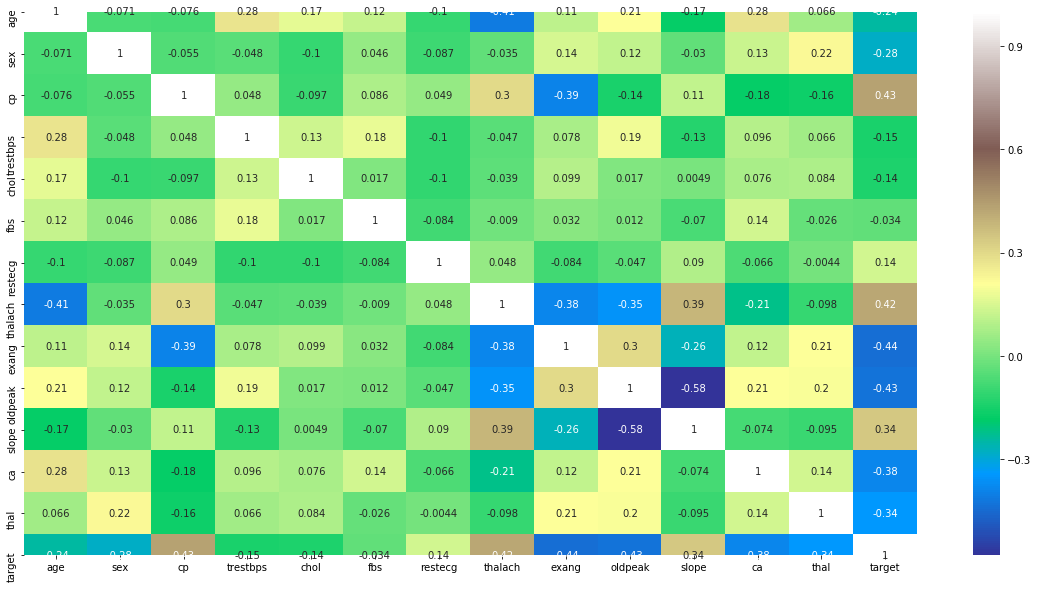

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df_rev.corr(), annot=True, cmap='terrain')

# we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

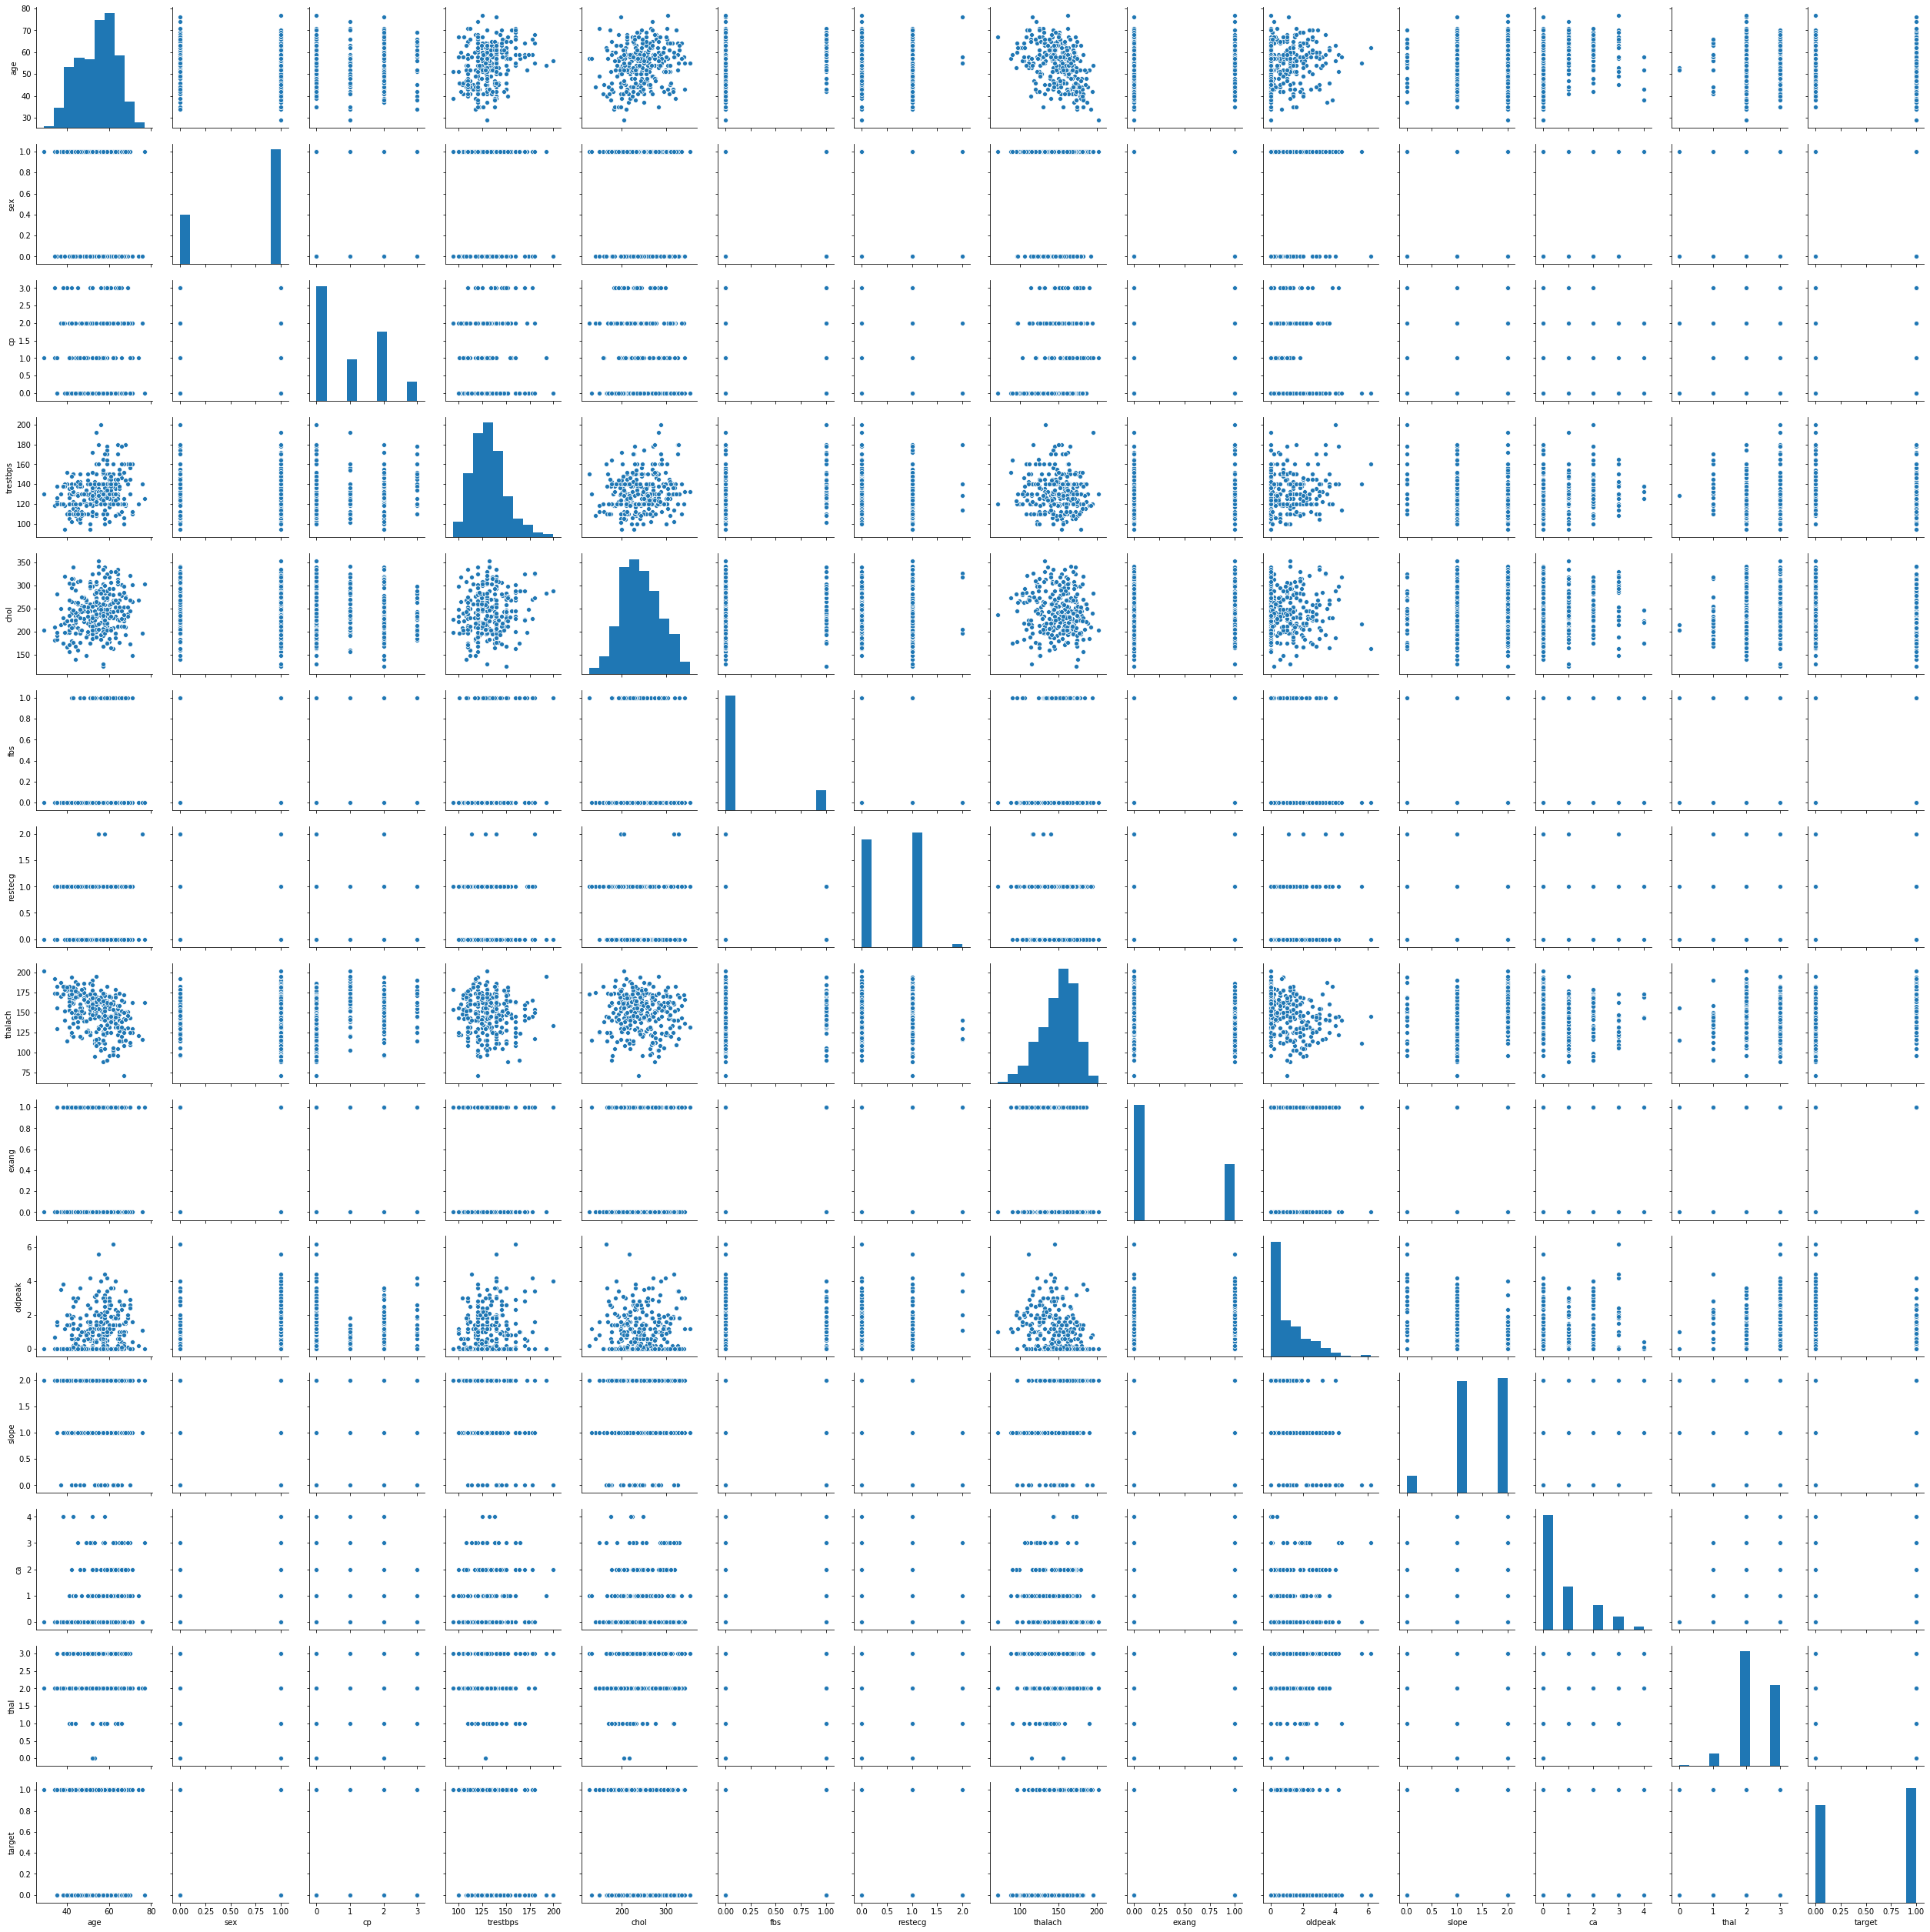

In [68]:

sns.pairplot(data=df_rev)

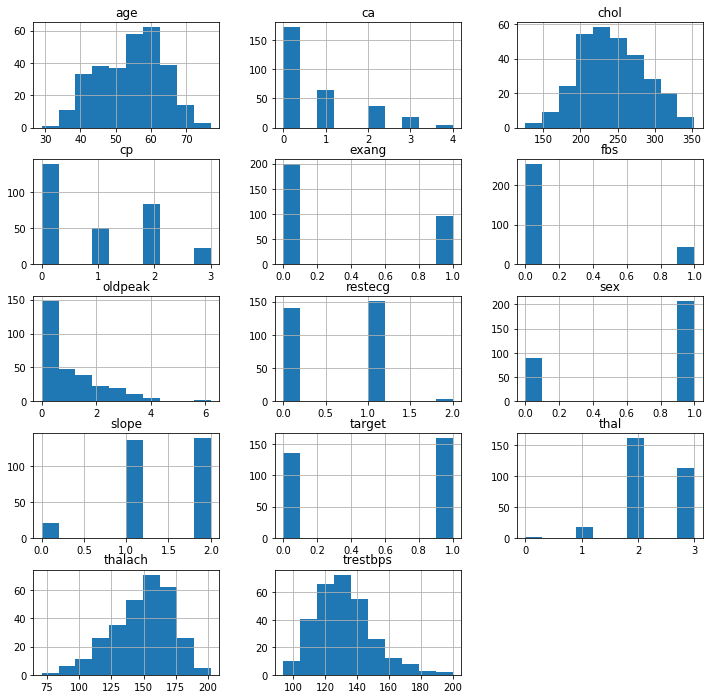

In [69]:
df_rev.hist(figsize=(12,12), layout=(5,3));

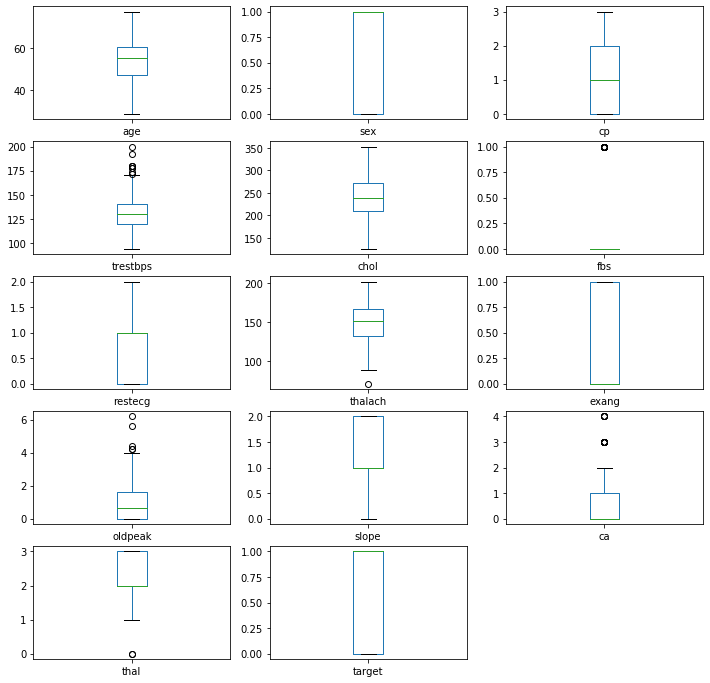

In [70]:
# box and whiskers plot
df_rev.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

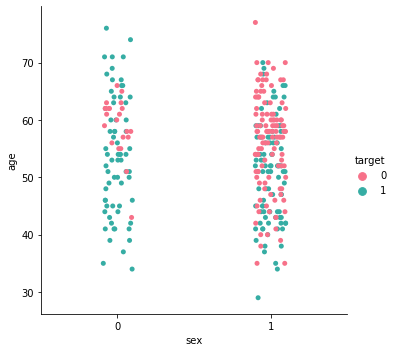

In [71]:
sns.catplot(data=df_rev, x='sex', y='age',  hue='target', palette='husl')

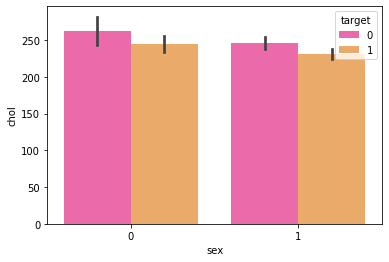

In [72]:
sns.barplot(data=df_rev, x='sex', y='chol', hue='target', palette='spring')

In [73]:
df_rev['sex'].value_counts()


1    207
0     89
Name: sex, dtype: int64

# 207 males and 96 females


In [74]:
df_rev['target'].value_counts()


1    160
0    136
Name: target, dtype: int64

# 160 cases of heart diseases  and  138 cases of no heart diseases

In [75]:
df_rev['thal'].value_counts()

2    162
3    114
1     18
0      2
Name: thal, dtype: int64

# results of thallium stress test measuring blood flow to the heart

with possible values normal, fixed_defect, reversible_defect

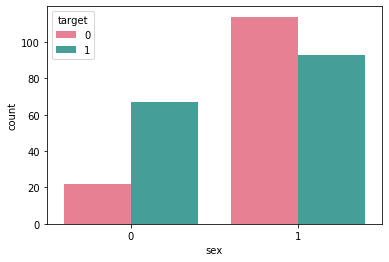

In [76]:
sns.countplot(x='sex', data=df_rev, palette='husl', hue='target')

# Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

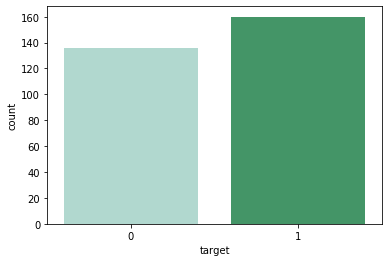

In [77]:
sns.countplot(x='target',palette='BuGn', data=df_rev)

# we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

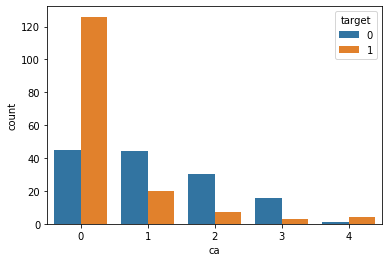

In [78]:
sns.countplot(x='ca',hue='target',data=df_rev)

# ca : number of major vessels (0-3) colored by flourosopy

In [79]:
df_rev['ca'].value_counts()

0    171
1     64
2     37
3     19
4      5
Name: ca, dtype: int64

# ca number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

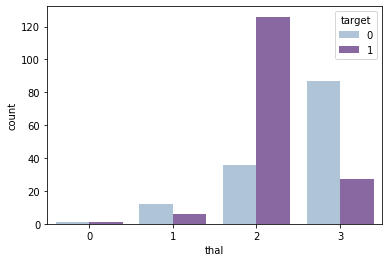

In [80]:
sns.countplot(x='thal',data=df_rev, hue='target', palette='BuPu' )

# thal3 = normal; 6 = fixed defect; 7 = reversable defect

In [81]:

df_rev['cp'].value_counts()  # chest pain type

0    139
2     84
1     50
3     23
Name: cp, dtype: int64

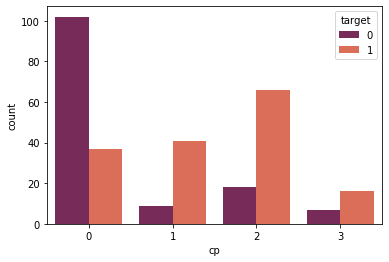

In [82]:
sns.countplot(x='cp' ,hue='target', data=df_rev, palette='rocket')

# shows chest pain with respect to heart disease/ target



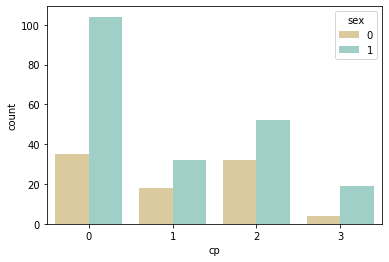

In [83]:
sns.countplot(x='cp', hue='sex',data=df_rev, palette='BrBG')

# this shows chest pain count experienced by male and female

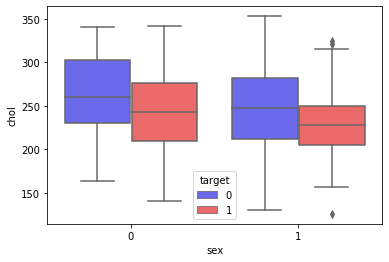

In [84]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df_rev)

# we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set

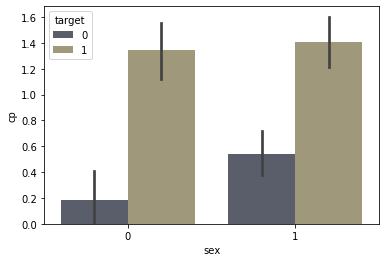

In [85]:
sns.barplot(x='sex', y='cp', hue='target',data=df_rev, palette='cividis')

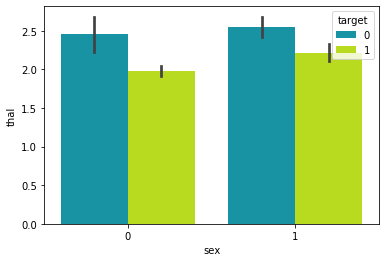

In [86]:

sns.barplot(x='sex', y='thal', data=df_rev, hue='target', palette='nipy_spectral')

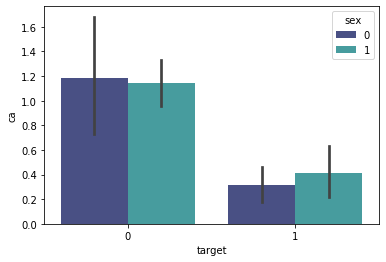

In [87]:

sns.barplot(x='target', y='ca', hue='sex', data=df_rev, palette='mako')

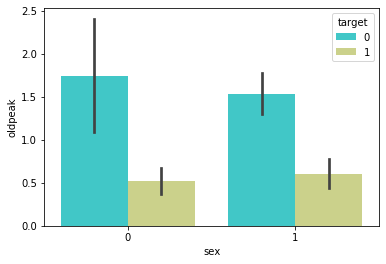

In [88]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df_rev)

# ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

# fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [89]:
df_rev['fbs'].value_counts()

0    252
1     44
Name: fbs, dtype: int64

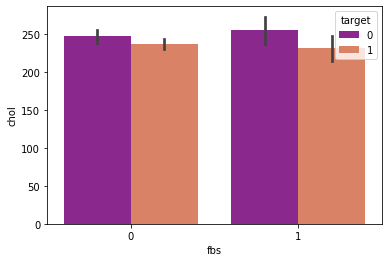

In [90]:

sns.barplot(x='fbs', y='chol', hue='target', data=df_rev,palette='plasma' )

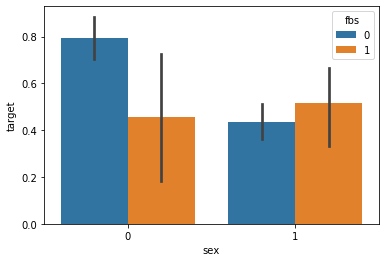

In [91]:
sns.barplot(x='sex',y='target', hue='fbs',data=df_rev)

# Cross Tables


In [92]:

gen = pd.crosstab(df_rev['sex'], df_rev['target'])
print(gen)

target    0   1
sex            
0        22  67
1       114  93


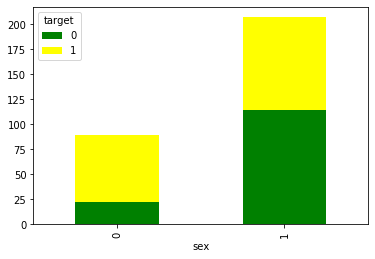

In [93]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [94]:

temp=pd.crosstab(index=df_rev['sex'],
            columns=[df_rev['thal']], 
            margins=True)
temp

thal  0   1    2    3  All
sex                       
0     1   1   75   12   89
1     1  17   87  102  207
All   2  18  162  114  296

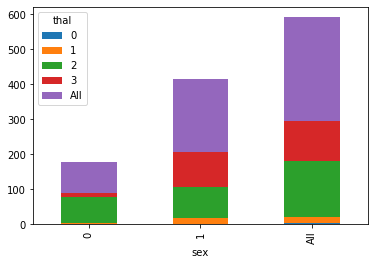

In [95]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [96]:

temp=pd.crosstab(index=df_rev['target'],
            columns=[df_rev['thal']], 
            margins=True)
temp

thal    0   1    2    3  All
target                      
0       1  12   36   87  136
1       1   6  126   27  160
All     2  18  162  114  296

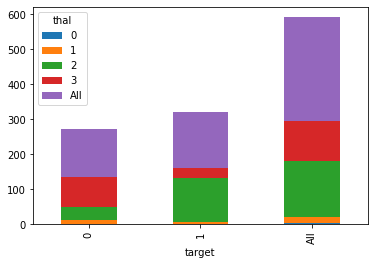

In [97]:

temp.plot(kind='bar', stacked=True)
plt.show()

In [98]:
chest_pain = pd.crosstab(df_rev['cp'], df_rev['target'])
chest_pain

target    0   1
cp             
0       102  37
1         9  41
2        18  66
3         7  16

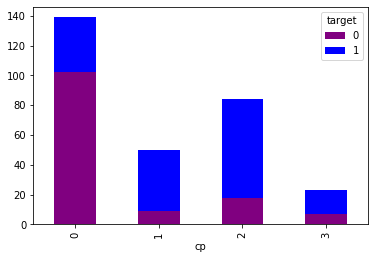

In [99]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [100]:
df_rev["target"].value_counts()

1    160
0    136
Name: target, dtype: int64

# CONCLUSION:THIS PROJECT WAS SUCCESSFULLY EXECUTED AND OUT OF 303 THERE ARE 160 HEART DISEASE PERSONS IS PRESENT IN MY RECORD

# Best accuracy is given by Logistic Regression : 83

# The accuracy given by kneighbor classifier:78

# The accuracy given by DecisionTree classifier:76

# The accuracy given by RandomForest classifier:81